In [246]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

Portfólio diversificado:

- **AAPL** – Apple Inc. (Tecnologia)  
- **MSFT** – Microsoft Corporation (Tecnologia)  
- **GOOGL** – Alphabet Inc. (Google) (Tecnologia)  
- **AMZN** – Amazon.com Inc. (E-commerce e tecnologia)  
- **META** – Meta Platforms Inc. (Facebook) (Tecnologia e redes sociais)  
- **TSLA** – Tesla Inc. (Automóveis elétricos e energia)  
- **NVDA** – NVIDIA Corporation (Semicondutores e inteligência artificial)  
- **BRK-B** – Berkshire Hathaway Inc. (Conglomerado de investimentos)  
- **JNJ** – Johnson & Johnson (Farmacêutica e produtos de saúde)  
- **JPM** – JPMorgan Chase & Co. (Serviços financeiros)  
- **V** – Visa Inc. (Serviços financeiros e pagamentos)  
- **PG** – Procter & Gamble Co. (Produtos de consumo)  
- **UNH** – UnitedHealth Group Inc. (Saúde e seguros)  
- **HD** – The Home Depot Inc. (Varejo de materiais de construção)  
- **MA** – Mastercard Inc. (Serviços financeiros e pagamentos)  
- **DIS** – The Walt Disney Company (Entretenimento e mídia)  
- **PEP** – PepsiCo Inc. (Alimentos e bebidas)  
- **KO** – The Coca-Cola Company (Bebidas)  
- **PFE** – Pfizer Inc. (Farmacêutica)  
- **INTC** – Intel Corporation (Semicondutores e tecnologia)  


In [275]:
# Lista com 20 ações diversificada
tickers = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'NVDA', 'BRK-B', 'JNJ', 'JPM',
    'V', 'PG', 'UNH', 'HD', 'MA', 'DIS', 'PEP', 'KO', 'PFE', 'INTC'
]

# Baixar cotações
#data = yf.download(tickers, start="2015-01-01", end="2025-05-01")['Close']
#data = pd.read_csv('precos_fechamento_portfolio.csv',index_col='Date',parse_dates=True)
# Carregar e preparar dados
data = pd.read_csv('precos_fechamento_portfolio.csv', index_col=0)
data.index = pd.to_datetime(data.index)
returns = data.pct_change().dropna()

In [277]:
#data.to_csv("precos_fechamento_portfolio.csv")
data.columns

Index(['AAPL', 'AMZN', 'BRK-B', 'DIS', 'GOOGL', 'HD', 'INTC', 'JNJ', 'JPM',
       'KO', 'MA', 'META', 'MSFT', 'NVDA', 'PEP', 'PFE', 'PG', 'TSLA', 'UNH',
       'V'],
      dtype='object')

In [279]:
tickers = list(data.columns)

In [281]:
# Calcular retorno acumulado de cada ação
returns = data.iloc[-1] / data.iloc[0] - 1  # retorno total no período
returns = returns.fillna(0).values # garantir que não haja NaNs
print([f"{x:.4f}" for x in returns])

['7.7375', '10.9551', '2.5748', '0.0538', '5.0262', '3.4298', '-0.2795', '0.9866', '4.1855', '1.3836', '5.8235', '6.0311', '8.8637', '224.4610', '0.9374', '0.2381', '1.4105', '18.2987', '3.7735', '4.6021']


## O coeficiente de Gini ##

** O coeficiente de Gini em uma análise de portfólio financeiro pode ajudar a avaliar a dispersão dos retornos ou a concentração da riqueza em ativos. Ele é tradicionalmente usado para medir desigualdade (como em distribuições de renda), mas também pode ser aplicado para entender concentração em finanças — por exemplo, concentração de peso em ativos ou desigualdade de retornos. **

In [285]:
dict_returns = dict(zip(tickers, returns))
dict_returns

{'AAPL': 7.737506288764376,
 'AMZN': 10.955140830794644,
 'BRK-B': 2.57478049571374,
 'DIS': 0.053759511549103856,
 'GOOGL': 5.02621870753046,
 'HD': 3.4298474618317067,
 'INTC': -0.27947849618960496,
 'JNJ': 0.9866187423712287,
 'JPM': 4.185455354682282,
 'KO': 1.383573593001434,
 'MA': 5.82345941154467,
 'META': 6.031070521926963,
 'MSFT': 8.863712044262218,
 'NVDA': 224.46100983620477,
 'PEP': 0.937448220124177,
 'PFE': 0.23812949597730682,
 'PG': 1.4105307610447997,
 'TSLA': 18.29870879566543,
 'UNH': 3.773495439717877,
 'V': 4.60213771396206}

In [287]:
# ----- Gini e Lorenz -----

def gini(array):
    """Calcula o coeficiente de Gini de um array."""
    array = np.sort(array)
    n = len(array)
    index = np.arange(1, n + 1)
    return np.sum((2 * index - n - 1) * array) / (n * np.sum(array))

In [289]:
gini_retornos = gini(returns)
print(f"Gini dos retornos do portfólio: {gini_retornos:.4f}")

Gini dos retornos do portfólio: 0.8063


Um Gini próximo de 0 indica diversificação, e próximo de 1 indica concentração extrema em poucos ativos.

In [292]:
def plot_lorenz_curve_with_gini(values, title="Curva de Lorenz - Retornos"):
    sorted_vals = np.sort(values)
    cumvals = np.cumsum(sorted_vals)
    cumvals = np.insert(cumvals, 0, 0)
    x = np.linspace(0.0, 1.0, len(cumvals))
    
    gini_value = gini(values)
    
    plt.figure(figsize=(7, 7))
    plt.plot(x, cumvals / cumvals[-1], label='Curva de Lorenz')
    plt.plot([0, 1], [0, 1], '--', color='gray', label='Igualdade perfeita')
    plt.title(f"{title}\nCoeficiente de Gini = {gini_value:.4f}")
    plt.xlabel("Proporção acumulada de ativos")
    plt.ylabel("Proporção acumulada de retornos")
    plt.grid(True)
    plt.legend()
    plt.show()

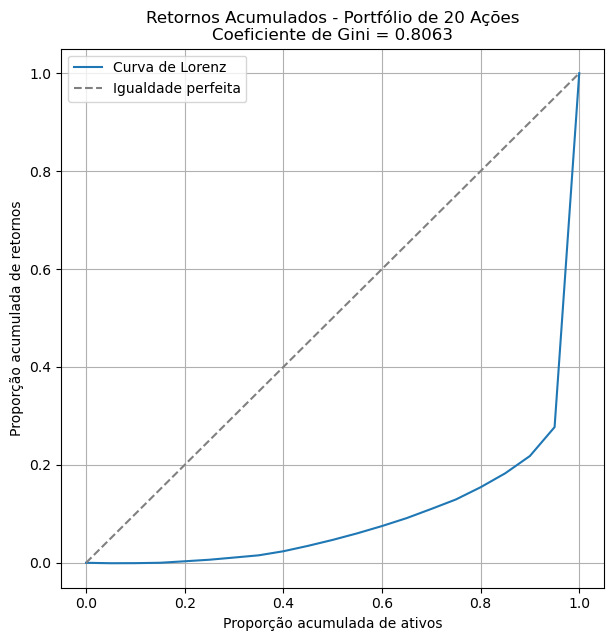

In [294]:
# Plotar a Curva de Lorenz com Gini
plot_lorenz_curve_with_gini(returns, title="Retornos Acumulados - Portfólio de 20 Ações")

A linha diagonal representa igualdade perfeita (todos os ativos com o mesmo peso).

Quanto mais curva a linha da Lorenz estiver, maior a concentração.

A área entre a linha da Lorenz e a diagonal se relaciona diretamente com o coeficiente de Gini

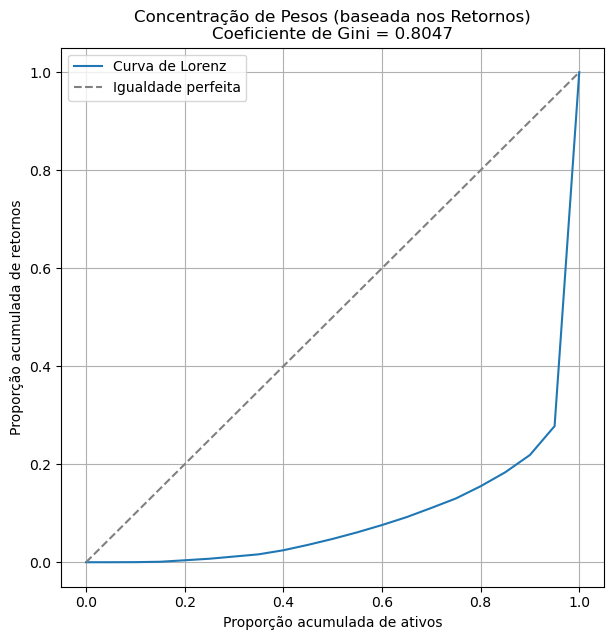

In [297]:
# Calcular pesos do portfólio baseados no retorno acumulado (como proxies de contribuição)
total_return = np.sum(returns)
weights = returns / total_return

# Tratar casos negativos (ex: cortar negativos para representar concentração positiva). Se algum retorno for negativo, 
# o peso correspondente também será negativo — o que não faz sentido em uma análise de concentração ou desigualdade 
#baseada em contribuições positivas. O zero é o mínimo aceito, abaixo disso é substituído por none
weights = np.clip(weights, 0, None)
weights = weights / weights.sum()  # normalizar novamente

# Plotar Curva de Lorenz dos pesos
plot_lorenz_curve_with_gini(weights, title="Concentração de Pesos (baseada nos Retornos)")


In [299]:
import seaborn as sns
import pandas as pd
dict_returns = dict(zip(tickers, returns))
dict_returns

{'AAPL': 7.737506288764376,
 'AMZN': 10.955140830794644,
 'BRK-B': 2.57478049571374,
 'DIS': 0.053759511549103856,
 'GOOGL': 5.02621870753046,
 'HD': 3.4298474618317067,
 'INTC': -0.27947849618960496,
 'JNJ': 0.9866187423712287,
 'JPM': 4.185455354682282,
 'KO': 1.383573593001434,
 'MA': 5.82345941154467,
 'META': 6.031070521926963,
 'MSFT': 8.863712044262218,
 'NVDA': 224.46100983620477,
 'PEP': 0.937448220124177,
 'PFE': 0.23812949597730682,
 'PG': 1.4105307610447997,
 'TSLA': 18.29870879566543,
 'UNH': 3.773495439717877,
 'V': 4.60213771396206}

In [301]:
# Criar DataFrame com tickers e retornos acumulados
df_returns = pd.DataFrame({
    'Ticker': tickers,
    'Retorno': returns
}).sort_values('Retorno', ascending=False)

df_returns

,Ticker,Retorno
13,NVDA,224.461010
17,TSLA,18.298709
1,AMZN,10.955141
12,MSFT,8.863712
0,AAPL,7.737506
11,META,6.031071
10,MA,5.823459
4,GOOGL,5.026219
19,V,4.602138
8,JPM,4.185455


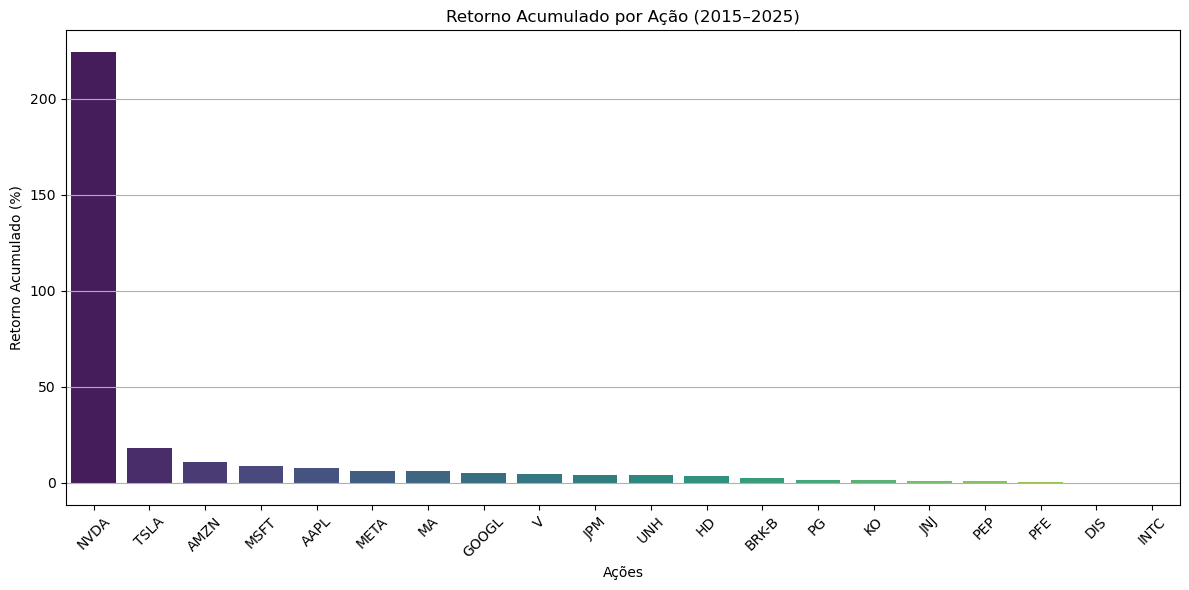

In [303]:
# Plotar gráfico de barras coloridas
plt.figure(figsize=(12, 6))
sns.barplot(x='Ticker', y='Retorno', data=df_returns, palette='viridis')

plt.title('Retorno Acumulado por Ação (2015–2025)')
plt.xlabel('Ações')
plt.ylabel('Retorno Acumulado (%)')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [305]:
# Estatísticas básicas com retornos
media_retorno = np.mean(returns)
mediana_retorno = np.median(returns)
std_retorno = np.std(returns)
gini_retorno = gini(returns)

# Top 3 ativos com maior peso
top3 = df_returns.head(3)

In [307]:
# Exibir resumo estatístico dos retornos acumulados
print("Resumo Estatístico dos Retornos Acumulados do Portfólio:")
print(f"- Média: {media_retorno:.4f}")
print(f"- Mediana: {mediana_retorno:.4f}")
print(f"- Desvio padrão: {std_retorno:.4f}")
print(f"- Coeficiente de Gini: {gini_retorno:.4f}")
print(f"- Top 3 ativos de maior retorno acumulado:")
for idx, row in top3.iterrows():
    print(f"   {row['Ticker']}: {row['Retorno']:.4f}")

Resumo Estatístico dos Retornos Acumulados do Portfólio:
- Média: 15.5247
- Mediana: 3.9795
- Desvio padrão: 48.1293
- Coeficiente de Gini: 0.8063
- Top 3 ativos de maior retorno acumulado:
   NVDA: 224.4610
   TSLA: 18.2987
   AMZN: 10.9551


## Análise de Componentes Principais (PCA) ##

A Análise de Componentes Principais (PCA) é uma técnica poderosa para:

Reduzir a dimensionalidade do portfólio;

Avaliar correlações entre ativos;

Identificar fatores latentes que explicam o comportamento conjunto das ações.

Aplicar PCA sobre os retornos diários dos ativos para:

Ver quantos componentes explicam a maior parte da variância;

Visualizar os ativos em um espaço de menor dimensão (ex: 2D);

Possivelmente identificar grupos de ativos com comportamento similar.

In [310]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [312]:
# 1. Calcular retornos diários. Criação de uma matriz (dataframe) onde cada coluna representa um ativo e cada linha um dia.
retornos_diarios = data.pct_change().dropna()

# 2. Padronizar os dados (média 0, desvio 1). Padronizamos os retornos para que cada ativo tenha média zero e desvio padrão um. 
#    Isso garante que todos os ativos tenham o mesmo peso na análise, independentemente da volatilidade.
scaler = StandardScaler()
retornos_padronizados = scaler.fit_transform(retornos_diarios)

# 3. PCA. Utilizamos a técnica de PCA para decompor a matriz de retornos em componentes principais. Cada componente é uma 
#    combinação linear dos ativos originais e representa um fator de risco comum.
pca = PCA()
componentes = pca.fit_transform(retornos_padronizados)

# 4. Variância explicada. Avaliamos quanta variância cada componente principal explica. Os primeiros componentes geralmente 
#    capturam a maior parte da variação dos retornos do portfólio.
explained_variance = pca.explained_variance_ratio_

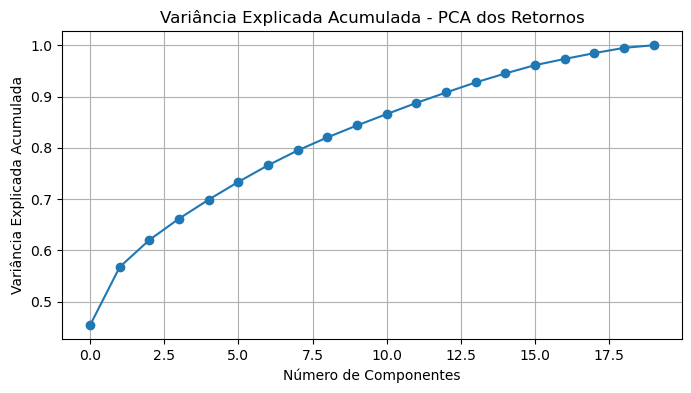

In [314]:
# Scree plot (variância explicada por componente)
#  help determine the optimal number of factors or components to retain in an analysis. 
#  It visually represents the eigenvalues of the factors/components, which indicate the amount of variance explained by each component
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.title('Variância Explicada Acumulada - PCA dos Retornos')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.grid(True)
plt.show()

In [316]:
# Salvar variáveis para uso posterior
#explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.components_.shape[0])],
    index=retornos.columns
)

# Mostrar quantos componentes existem
num_components = pca.n_components_
print('Número total de componentes:', num_components)

Número total de componentes: 20


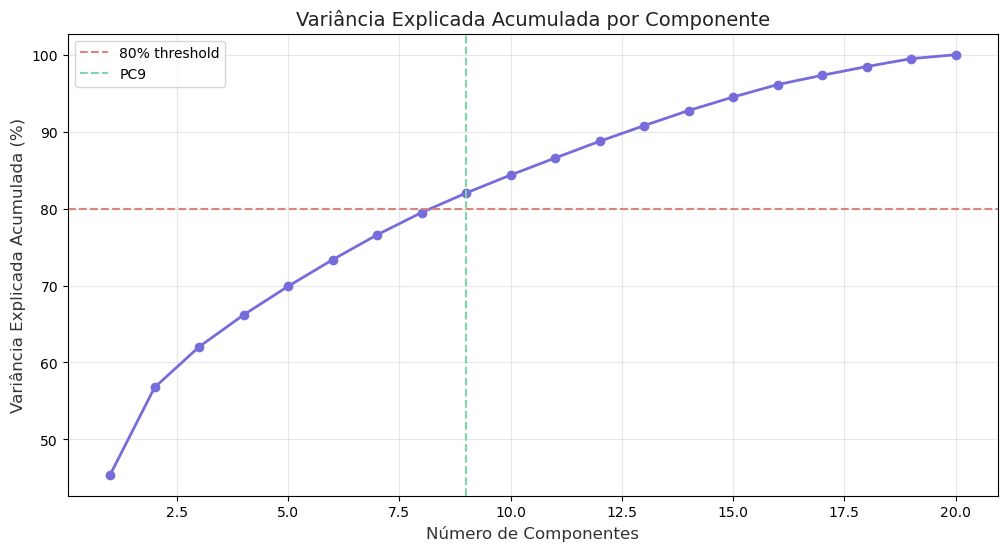

Variância explicada por componente:
      Variância Explicada (%)  Variância Acumulada (%)
PC1                     45.41                    45.41
PC2                     11.36                    56.77
PC3                      5.27                    62.04
PC4                      4.15                    66.19
PC5                      3.71                    69.91
PC6                      3.46                    73.36
PC7                      3.24                    76.60
PC8                      2.90                    79.49
PC9                      2.54                    82.03
PC10                     2.34                    84.37
Número de componentes necessários para explicar 80% da variância: 9
Variância explicada com 9 componentes: 82.03%


In [318]:
# Calcular variância explicada e acumulada
var_explicada = pca.explained_variance_ratio_ * 100
var_acumulada = np.cumsum(var_explicada)

# Criar DataFrame com os resultados
resultados = pd.DataFrame({
    'Variância Explicada (%)': var_explicada,
    'Variância Acumulada (%)': var_acumulada
}, index=[f'PC{i+1}' for i in range(len(var_explicada))])

# Encontrar componente que atinge 80%
componente_80 = np.where(var_acumulada >= 80)[0][0] + 1

# Plotar gráfico
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(var_acumulada) + 1), var_acumulada, 
         marker='o', color='#766CDB', linewidth=2)
plt.axhline(y=80, color='#DA847C', linestyle='--', label='80% threshold')
plt.axvline(x=componente_80, color='#7CD9A5', linestyle='--', 
            label=f'PC{componente_80}')

plt.xlabel('Número de Componentes', fontsize=12, color='#333333')
plt.ylabel('Variância Explicada Acumulada (%)', fontsize=12, color='#333333')
plt.title('Variância Explicada Acumulada por Componente', 
          fontsize=14, color='#222222')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Mostrar tabela com os primeiros 10 componentes
print("\
Variância explicada por componente:")
print(resultados.head(10).round(2))

print(f"\
Número de componentes necessários para explicar 80% da variância: {componente_80}")
print(f"Variância explicada com {componente_80} componentes: {var_acumulada[componente_80-1]:.2f}%")

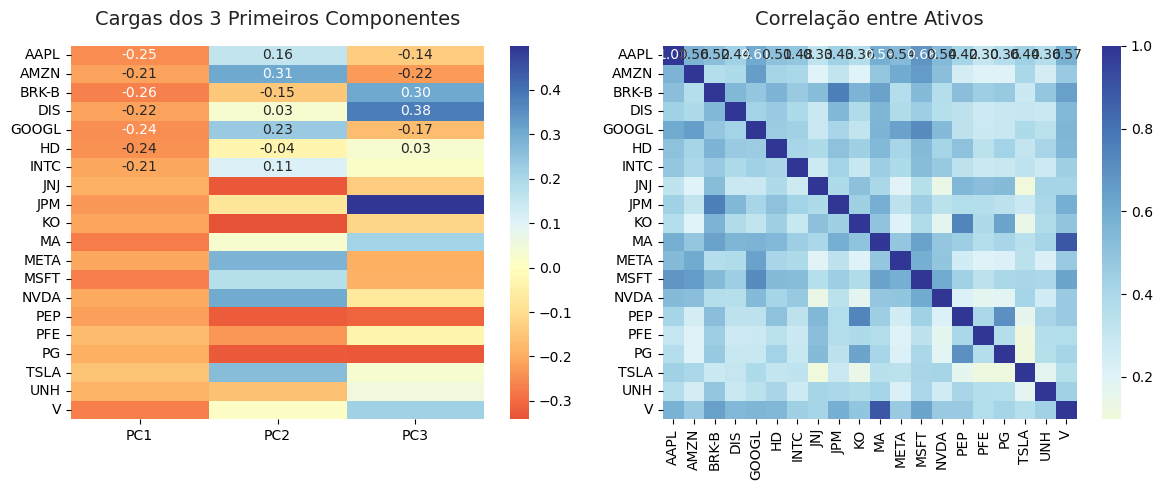

Contribuição relativa dos ativos para o primeiro componente principal (PC1):
MA: 7.46%
V: 7.39%
MSFT: 7.25%
BRK-B: 6.98%
AAPL: 6.30%
GOOGL: 5.92%
HD: 5.74%
JPM: 5.41%
PEP: 4.75%
DIS: 4.66%
AMZN: 4.58%
KO: 4.45%
META: 4.33%
INTC: 4.28%
NVDA: 4.12%
PG: 3.87%
JNJ: 3.64%
UNH: 3.51%
PFE: 2.93%
TSLA: 2.42%


In [321]:
# Criar DataFrame com as cargas dos componentes
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.components_.shape[0])],
    index=retornos_diarios.columns
)

# Plot 1: Heatmap das cargas dos primeiros 3 componentes
plt.figure(figsize=(12, 5))

# Subplot 1: Heatmap das cargas
plt.subplot(1, 2, 1)
sns.heatmap(loadings.iloc[:, :3], cmap='RdYlBu', center=0, annot=True, fmt='.2f')
plt.title('Cargas dos 3 Primeiros Componentes', fontsize=14, color='#222222', pad=15)

# Subplot 2: Correlação entre ativos
plt.subplot(1, 2, 2)
sns.heatmap(retornos_diarios.corr(), cmap='RdYlBu', center=0, annot=True, fmt='.2f')
plt.title('Correlação entre Ativos', fontsize=14, color='#222222', pad=15)

plt.tight_layout()
plt.show()

# Mostrar contribuição relativa de cada ativo para PC1
print("\
Contribuição relativa dos ativos para o primeiro componente principal (PC1):")
pc1_contrib = pd.Series(loadings['PC1']**2, index=loadings.index).sort_values(ascending=False)
for ativo, contrib in pc1_contrib.items():
    print(f"{ativo}: {contrib*100:.2f}%")

         PC1    PC2
TSLA  -0.156  0.260
PFE   -0.171 -0.235
UNH   -0.187 -0.159
JNJ   -0.191 -0.333
PG    -0.197 -0.325
NVDA  -0.203  0.301
INTC  -0.207  0.106
META  -0.208  0.279
KO    -0.211 -0.341
AMZN  -0.214  0.308
DIS   -0.216  0.028
PEP   -0.218 -0.324
JPM   -0.233 -0.077
HD    -0.240 -0.036
GOOGL -0.243  0.231
AAPL  -0.251  0.157
BRK-B -0.264 -0.145
MSFT  -0.269  0.177
V     -0.272  0.007
MA    -0.273  0.025


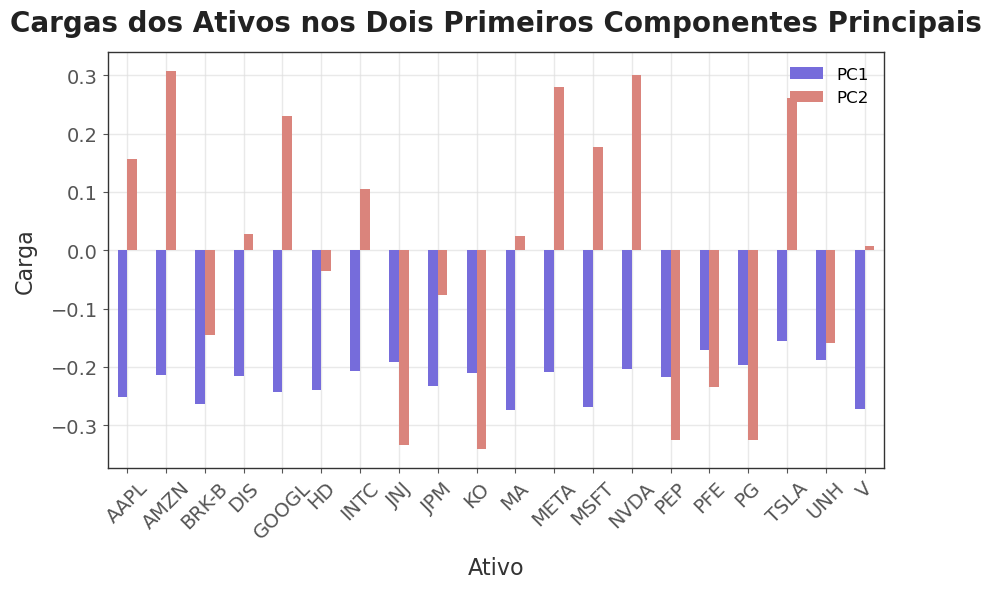

In [2]:
# Análise das cargas dos componentes principais (loadings) na PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Carregar dados
data = pd.read_csv('precos_fechamento_portfolio.csv', index_col=0)
retornos = data.pct_change().dropna()

# Padronizar retornos
scaler = StandardScaler()
retornos_pad = scaler.fit_transform(retornos)

# Aplicar PCA
pca = PCA()
pca.fit(retornos_pad)

# Obter as cargas (loadings) dos dois primeiros componentes
loadings = pd.DataFrame(
    pca.components_[:2].T,
    columns=['PC1', 'PC2'],
    index=retornos.columns
)

# Visualizar as cargas em tabela
print(loadings.round(3).sort_values('PC1', ascending=False))

# Visualizar as cargas em gráfico de barras
fig, ax = plt.subplots(figsize=(9, 6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
loadings[['PC1', 'PC2']].plot(kind='bar', ax=ax, color=['#766CDB', '#DA847C'])
ax.set_title('Cargas dos Ativos nos Dois Primeiros Componentes Principais', fontsize=20, fontweight='semibold', color='#222222', pad=15)
ax.set_xlabel('Ativo', fontsize=16, fontweight='medium', color='#333333', labelpad=10)
ax.set_ylabel('Carga', fontsize=16, fontweight='medium', color='#333333', labelpad=10)
ax.tick_params(axis='x', labelsize=14, labelrotation=45, colors='#555555')
ax.tick_params(axis='y', labelsize=14, colors='#555555')
ax.legend(fontsize=12, loc='upper right', frameon=False)
ax.set_axisbelow(True)
ax.grid(True, color='#E0E0E0', linestyle='-', linewidth=1, alpha=0.7)
for spine in ax.spines.values():
    spine.set_color('#333333')
    spine.set_linewidth(1)
plt.tight_layout()
plt.show()

## O que isso significa na prática?

- Um valor de carga **alto** (positivo ou negativo) indica que o ativo tem **forte influência** naquele componente principal.
- Se vários ativos têm **cargas altas e do mesmo sinal** em um componente, eles tendem a **se mover juntos** quando esse fator de risco se manifesta.
- Por exemplo, se **PC1 representa o “fator de mercado”**, ativos com **cargas negativas altas** em PC1 tendem a **cair juntos** quando o mercado cai.
- Já **PC2 pode capturar um fator setorial ou de estilo** (como **crescimento vs. valor**), e ativos com **cargas altas em PC2** vão responder **mais fortemente** a esse fator.
- Essas informações ajudam a **entender quais ativos estão expostos aos mesmos riscos** e a **construir um portfólio mais diversificado**, escolhendo ativos com **exposições diferentes** aos principais componentes.
- Assim, você **reduz o risco** de ter muitos ativos que **se comportam de forma semelhante** em cenários adversos.

## PC1: O Primeiro Componente Principal

O **PC1**, ou **primeiro componente principal**, representa o **principal fator de risco comum** que afeta todos os ativos do portfólio — conhecido como **fator de mercado**. Esse fator geralmente está associado ao **movimento geral do mercado de ações**, refletindo o **risco sistêmico** ao qual todos os ativos estão expostos.

### Na análise realizada, observamos que:

- O **PC1 explica 45,41% da variância total dos retornos dos ativos**, ou seja, quase metade da **volatilidade dos ativos** pode ser atribuída a esse fator comum.
- As **cargas (loadings) dos ativos em PC1 são todas negativas e de magnitude semelhante**, indicando que **todos os ativos respondem de forma parecida** a esse fator.
- Isso é típico do **fator de mercado**, pois, em momentos de **alta ou baixa do mercado**, a **maioria dos ativos tende a se mover na mesma direção**.

### PC1 como Fator de Mercado

Portanto, o **PC1** pode ser interpretado como o **fator de mercado** — o **risco sistêmico** que afeta **todos os ativos simultaneamente**. 

- Quando o **PC1 sobe**, todos os ativos tendem a **subir juntos**.
- Quando o **PC1 cai**, todos os ativos tendem a **cair juntos**.
- Esse é o **principal condutor comum** dos retornos do portfólio.
- Sua **identificação é fundamental** para entender a **exposição ao risco de mercado**.

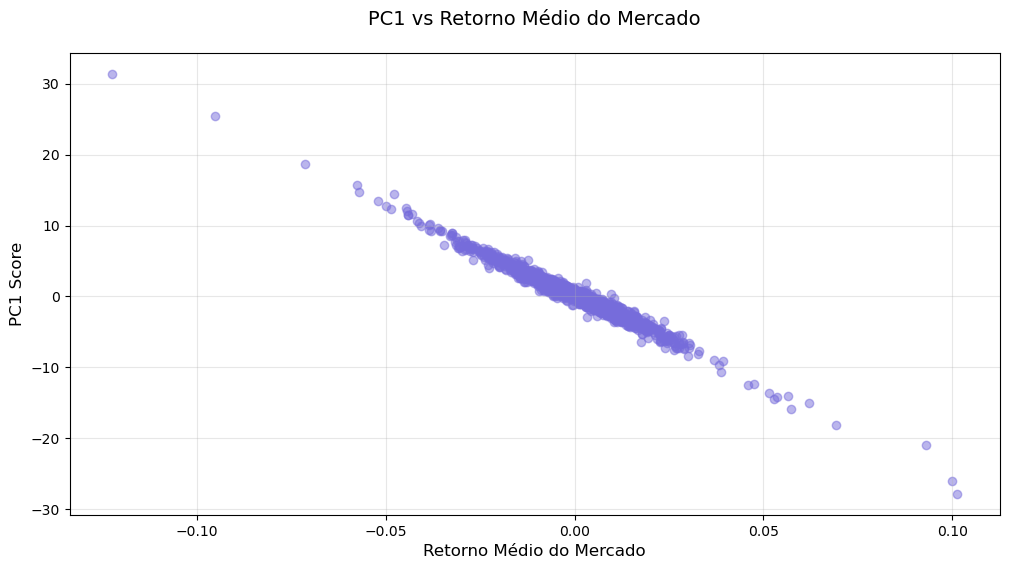

Correlação entre PC1 e Retorno do Mercado: -0.988


In [14]:
# Análise do fator de mercado (PC1)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Carregar e preparar dados
data = pd.read_csv('precos_fechamento_portfolio.csv', index_col=0)
retornos = data.pct_change().dropna()

# Padronizar retornos
scaler = StandardScaler()
retornos_pad = scaler.fit_transform(retornos)

# Aplicar PCA
pca = PCA()
pc_scores = pd.DataFrame(
    pca.fit_transform(retornos_pad),
    index=retornos.index,
    columns=[f'PC{i+1}' for i in range(retornos_pad.shape[1])]
)

# Calcular retorno médio do mercado (média igualmente ponderada dos retornos)
mkt_return = retornos.mean(axis=1)

# Correlação entre PC1 e retorno do mercado
corr = pc_scores['PC1'].corr(mkt_return)

# Plot PC1 vs Retorno do Mercado
plt.figure(figsize=(12, 6))
plt.scatter(mkt_return, pc_scores['PC1'], alpha=0.5, color='#766CDB')
plt.title('PC1 vs Retorno Médio do Mercado', fontsize=14, pad=20)
plt.xlabel('Retorno Médio do Mercado', fontsize=12)
plt.ylabel('PC1 Score', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

print("\
Correlação entre PC1 e Retorno do Mercado:", round(corr, 3))

# Análise das contribuições dos ativos para PC1
loadings = pd.DataFrame(
    pca.components_[0],
    index=retornos.columns,
    columns=['Loading']
).sort_values('Loading')



### Correlação entre PC1 e Retorno do Mercado

**-0.988**

A correlação **extremamente alta (negativa)** de **-0.988** entre **PC1** e o **retorno médio do mercado** confirma que **PC1 é, de fato, o fator de mercado**. 

> O sinal negativo é apenas uma questão de **convenção matemática da PCA** e não afeta a interpretação.

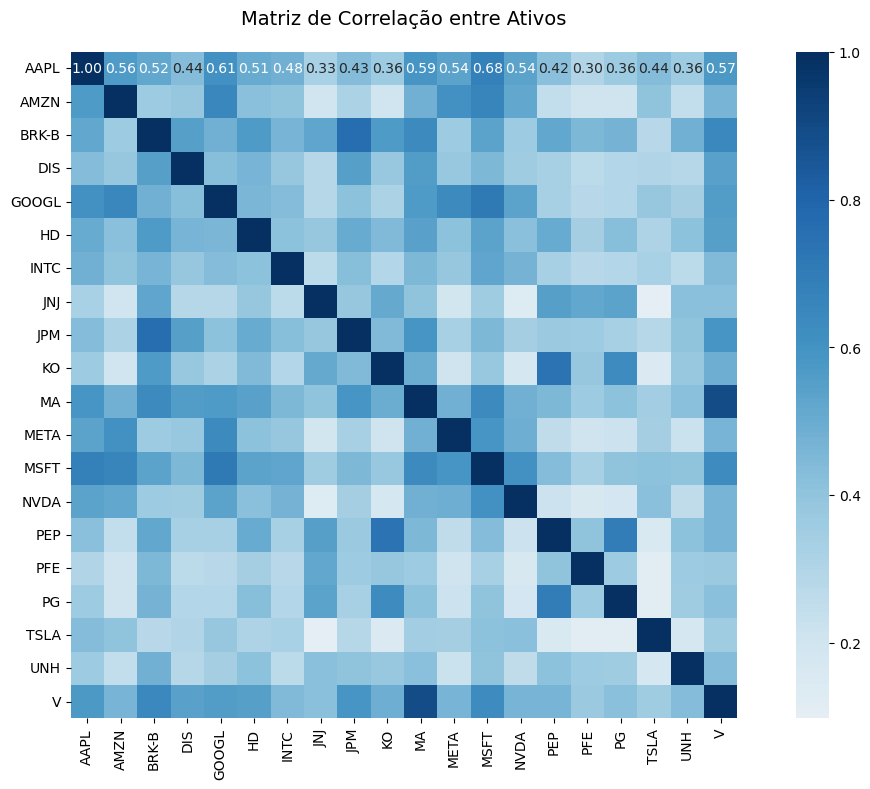

In [12]:
# Heatmap das correlações entre ativos
plt.figure(figsize=(12, 8))
sns.heatmap(retornos.corr(), 
            cmap='RdBu',
            center=0,
            annot=True,
            fmt='.2f',
            square=True)
plt.title('Matriz de Correlação entre Ativos', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

## Heatmap das Correlações

O **heatmap das correlações** mostra que:

- **Todos os ativos** têm **correlações positivas** entre si.
- **Grupos setoriais** apresentam **correlações mais fortes** (ex: **tecnologia, consumo defensivo**).
- As **correlações positivas** explicam por que **todas as cargas em PC1 são do mesmo sinal**.

### Interpretação do Fator de Mercado (PC1)

#### Magnitude das Cargas:
- **Ativos financeiros** (**MA, V**) têm as **maiores cargas negativas** (**-0.273, -0.272**).
- **Tecnologia** (**MSFT, AAPL, GOOGL**) tem **cargas intermediárias**.
- **Defensivos** (**KO, PG, JNJ**) têm **cargas menores**.
- **TSLA** tem a **menor carga** (**-0.156**), indicando **menor sensibilidade ao fator de mercado**.

### Implicações para Gestão de Risco:
- **Ativos com cargas maiores** são **mais sensíveis ao movimento geral do mercado**.
- **Ativos com cargas menores** oferecem **melhor proteção contra movimentos do mercado**.
- A **diversificação** deve considerar **não só os setores, mas também a sensibilidade ao fator de mercado**.

### Construção de Portfólio:
- Para **reduzir o risco de mercado**, combine ativos com **diferentes sensibilidades ao PC1**.
- **Ativos defensivos** podem ser usados para **reduzir a exposição ao fator de mercado**.
- A **alocação** pode ser ajustada **com base nas cargas** para **controlar a exposição ao risco sistêmico**.

### Importância do PC1:
O **PC1 captura efetivamente o risco sistemático do mercado**, sendo crucial para:
- **Entender a exposição do portfólio** ao **risco de mercado**.
- **Identificar ativos** mais e menos **sensíveis aos movimentos gerais**.
- **Otimizar a diversificação** considerando **a sensibilidade ao fator de mercado**.
- **Ajustar a exposição ao risco sistêmico** de acordo com **os objetivos do investidor**.

       Peso PC1
AAPL     0.0567
AMZN     0.0484
BRK-B    0.0597
DIS      0.0488
GOOGL    0.0550
HD       0.0542
INTC     0.0468
JNJ      0.0431
JPM      0.0526
KO       0.0477
MA       0.0618
META     0.0470
MSFT     0.0609
NVDA     0.0459
PEP      0.0493
PFE      0.0387
PG       0.0445
TSLA     0.0352
UNH      0.0424
V        0.0615


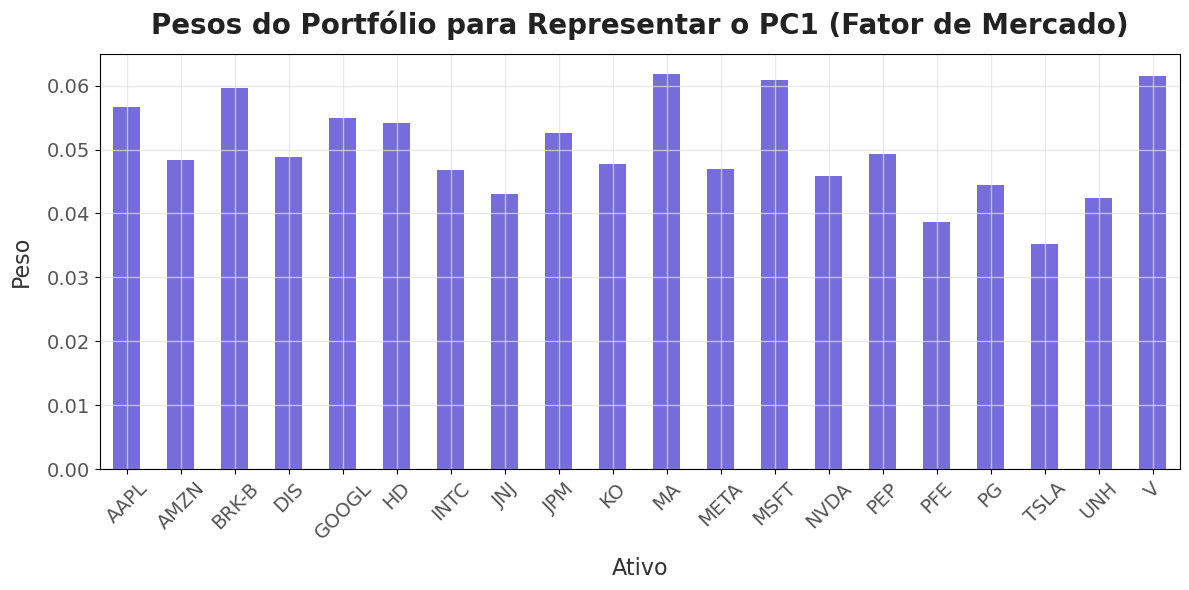

In [18]:
# Definir os pesos do portfólio para representar o PC1 (fator de mercado)
# Os pesos são proporcionais às cargas (loadings) do PC1
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Carregar dados e calcular retornos
data = pd.read_csv('precos_fechamento_portfolio.csv', index_col=0)
retornos = data.pct_change().dropna()

# Padronizar retornos
global_scaler = StandardScaler()
retornos_pad = global_scaler.fit_transform(retornos)

# PCA
global_pca = PCA()
global_pca.fit(retornos_pad)

# Cargas do PC1
pc1_loadings = pd.Series(global_pca.components_[0], index=retornos.columns)

# Pesos proporcionais às cargas do PC1 (normalizados para somar 1)
pesos_pc1 = pc1_loadings / pc1_loadings.sum()

# Tabela de pesos
pesos_pc1_df = pd.DataFrame({'Peso PC1': pesos_pc1.round(4)})

# Mostrar tabela de pesos
print(pesos_pc1_df)

# Visualizar os pesos em gráfico de barras
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
pesos_pc1_df['Peso PC1'].plot(kind='bar', color='#766CDB')
plt.title('Pesos do Portfólio para Representar o PC1 (Fator de Mercado)', fontsize=20, fontweight='semibold', color='#222222', pad=15)
plt.xlabel('Ativo', fontsize=16, fontweight='medium', color='#333333', labelpad=10)
plt.ylabel('Peso', fontsize=16, fontweight='medium', color='#333333', labelpad=10)
plt.xticks(rotation=45, fontsize=14, color='#555555')
plt.yticks(fontsize=14, color='#555555')
plt.grid(True, color='#E0E0E0', linestyle='-', linewidth=1, alpha=0.7)
plt.tight_layout()
plt.show()

### Contribuição dos Ativos para o Fator de Mercado

Esses **pesos** mostram como **cada ativo contribui** para o **fator de mercado** do portfólio. 

- **Ativos com maior peso** têm **maior influência** sobre o **risco sistêmico**.
- **Ativos com menor peso** têm **menor sensibilidade** ao **movimento geral do mercado**.
- Isso permite **construir um portfólio** que **replica o comportamento** do **principal fator de risco** identificado pela **análise de componentes principais**.

### Aplicações do Portfólio Baseado no PC1

Esse tipo de portfólio é útil para:

- **Analisar** a **exposição do portfólio** ao **risco de mercado**.
- **Comparar** a **performance de estratégias ativas** versus o **fator de mercado**.
- **Criar portfólios “neutros”** a outros fatores, **focando apenas** no **risco sistêmico**.

Se quiser **construir portfólios** que representem **outros fatores** (como **PC2, PC3, etc.**), basta **usar as cargas correspondentes** de cada **componente como pesos**.

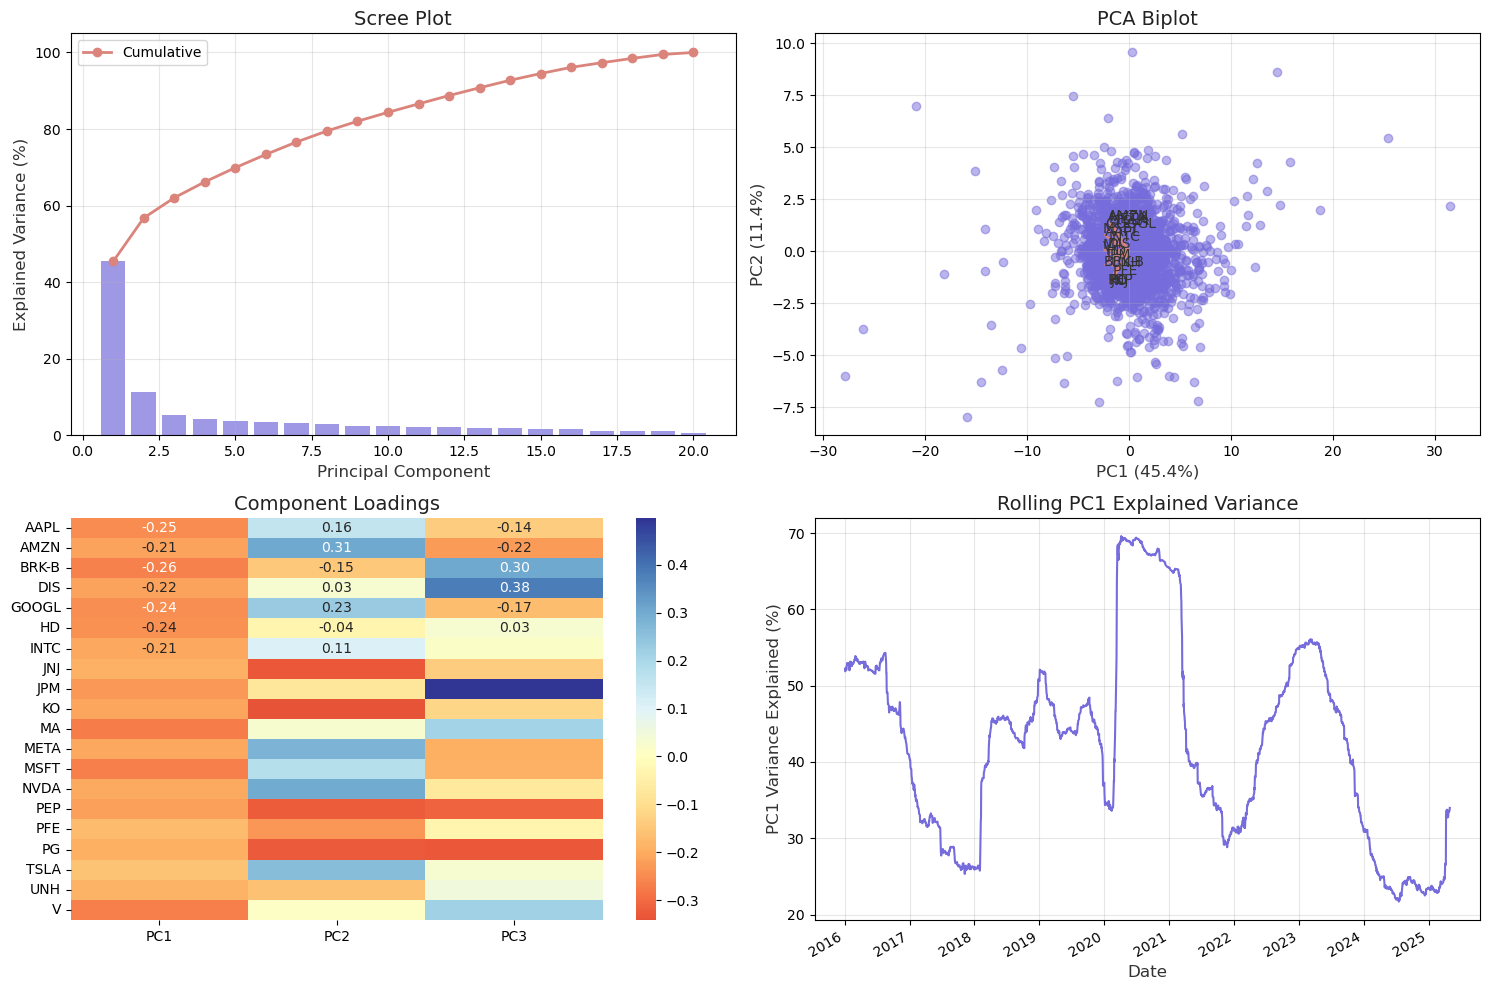

Risk Concentration Analysis:
     Explained Variance (%)  Cumulative Variance (%)
PC1                   45.41                    45.41
PC2                   11.36                    56.77
PC3                    5.27                    62.04
PC4                    4.15                    66.19
PC5                    3.71                    69.91
Top 5 Asset Contributions to PC1:
       Loading  Squared Loading  Contribution (%)
MA       -0.27             0.07              7.46
V        -0.27             0.07              7.39
MSFT     -0.27             0.07              7.25
BRK-B    -0.26             0.07              6.98
AAPL     -0.25             0.06              6.30


In [364]:
# Load and prepare data
data = pd.read_csv('precos_fechamento_portfolio.csv', index_col=0)
data.index = pd.to_datetime(data.index)
returns = data.pct_change().dropna()

# Standardize returns
scaler = StandardScaler()
returns_scaled = scaler.fit_transform(returns)

# Apply PCA
pca = PCA()
pca_results = pca.fit_transform(returns_scaled)

# Create visualization subplots
fig = plt.figure(figsize=(15, 10))

# 1. Scree plot with cumulative variance. O scree plot apresentado abaixo mostra a variância explicada por cada componente principal (PC) do portfólio.
#Cada barra representa a porcentagem de variância explicada individualmente por cada componente, enquanto a linha mostra a variância acumulada 
# à medida que mais componentes são adicionados.
ax1 = plt.subplot(2, 2, 1)
var_exp = pca.explained_variance_ratio_ * 100
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, len(var_exp)+1), var_exp, color='#766CDB', alpha=0.7)
plt.plot(range(1, len(cum_var_exp)+1), cum_var_exp, color='#DA847C', 
         marker='o', linewidth=2, label='Cumulative')
plt.xlabel('Principal Component', fontsize=12, color='#333333')
plt.ylabel('Explained Variance (%)', fontsize=12, color='#333333')
plt.title('Scree Plot', fontsize=14, color='#222222')
plt.grid(True, alpha=0.3)
plt.legend()

# 2. Biplot of first two components. No gráfico abaixo, cada ponto roxo representa um dia de retorno 
# do portfólio projetado no espaço dos dois primeiros componentes principais. As setas vermelhas indicam a direção 
# e a intensidade da contribuição de cada ativo para esses componentes. Quanto maior a seta, maior a influência do ativo naquele fator.
ax2 = plt.subplot(2, 2, 2)
loadings = pca.components_.T[:, :2]
scaled_loadings = loadings * np.sqrt(pca.explained_variance_[:2])

plt.scatter(pca_results[:, 0], pca_results[:, 1], alpha=0.5, color='#766CDB')
for i, (x, y) in enumerate(scaled_loadings):
    plt.arrow(0, 0, x*3, y*3, color='#DA847C', alpha=0.8)
    plt.text(x*3.2, y*3.2, returns.columns[i], color='#333333')

plt.xlabel(f'PC1 ({var_exp[0]:.1f}%)', fontsize=12, color='#333333')
plt.ylabel(f'PC2 ({var_exp[1]:.1f}%)', fontsize=12, color='#333333')
plt.title('PCA Biplot', fontsize=14, color='#222222')
plt.grid(True, alpha=0.3)

# 3. Heatmap of component loadings
ax3 = plt.subplot(2, 2, 3)
loadings_df = pd.DataFrame(
    pca.components_[:3].T,
    columns=['PC1', 'PC2', 'PC3'],
    index=returns.columns
)
sns.heatmap(loadings_df, cmap='RdYlBu', center=0, annot=True, fmt='.2f')
plt.title('Component Loadings', fontsize=14, color='#222222')

# 4. Rolling variance explained
window = 252  # One year
rolling_pca = pd.DataFrame(index=returns.index[window-1:])
for i in range(len(returns.index[window-1:])):
    temp_returns = returns_scaled[i:i+window]
    temp_pca = PCA()
    temp_pca.fit(temp_returns)
    rolling_pca.loc[returns.index[i+window-1], 'PC1'] = temp_pca.explained_variance_ratio_[0] * 100

ax4 = plt.subplot(2, 2, 4)
rolling_pca['PC1'].plot(color='#766CDB')
plt.xlabel('Date', fontsize=12, color='#333333')
plt.ylabel('PC1 Variance Explained (%)', fontsize=12, color='#333333')
plt.title('Rolling PC1 Explained Variance', fontsize=14, color='#222222')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate risk concentration
risk_concentration = pd.DataFrame({
    'Explained Variance (%)': var_exp,
    'Cumulative Variance (%)': cum_var_exp
}, index=[f'PC{i+1}' for i in range(len(var_exp))])

print("\
Risk Concentration Analysis:")
print(risk_concentration.head().round(2))

# Calculate asset contributions to PC1
pc1_contributions = pd.DataFrame({
    'Loading': pca.components_[0],
    'Squared Loading': pca.components_[0]**2,
    'Contribution (%)': (pca.components_[0]**2 / np.sum(pca.components_[0]**2)) * 100
}, index=returns.columns).sort_values('Contribution (%)', ascending=False)

print("\
Top 5 Asset Contributions to PC1:")
print(pc1_contributions.head().round(2))

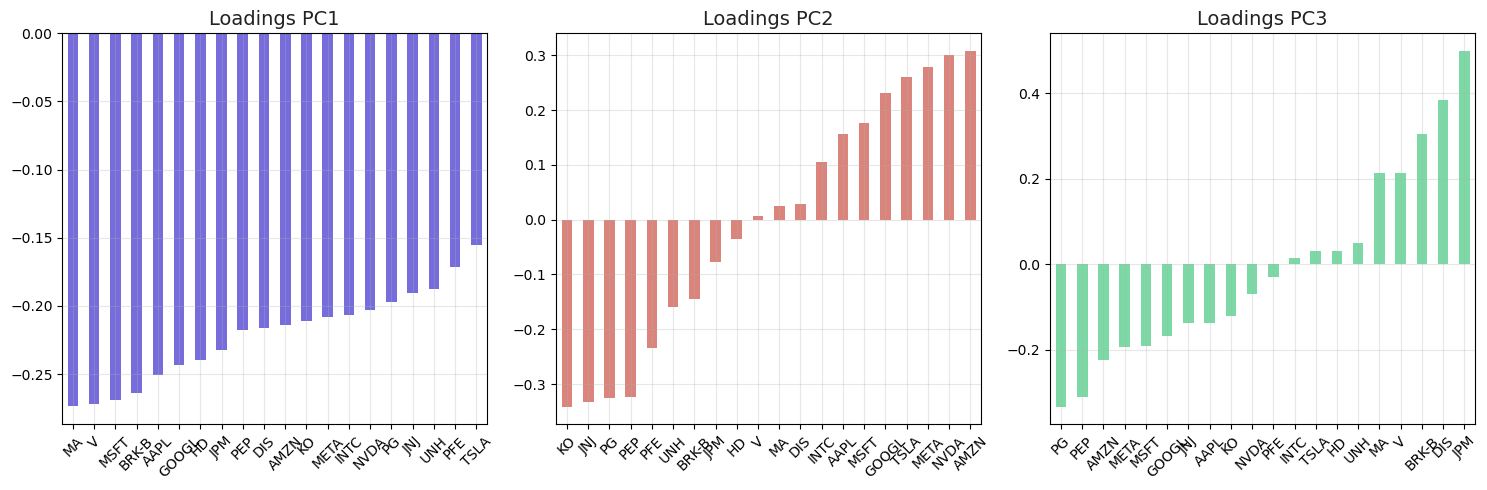

Contribuições para PC1:
MA       7.46
V        7.39
MSFT     7.25
BRK-B    6.98
AAPL     6.30
Name: PC1, dtype: float64
Contribuições para PC2:
KO      11.64
JNJ     11.09
PG      10.59
PEP     10.53
AMZN     9.47
Name: PC2, dtype: float64
Contribuições para PC3:
JPM      24.83
DIS      14.66
PG       11.08
PEP       9.62
BRK-B     9.22
Name: PC3, dtype: float64


In [354]:
# Análise detalhada dos componentes principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Carregar e preparar dados
data = pd.read_csv('precos_fechamento_portfolio.csv', index_col=0)
data.index = pd.to_datetime(data.index)
returns = data.pct_change().dropna()

# Padronizar retornos
scaler = StandardScaler()
returns_scaled = scaler.fit_transform(returns)

# Aplicar PCA
pca = PCA()
pca_results = pca.fit_transform(returns_scaled)

# Criar DataFrame com loadings
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.components_.shape[0])],
    index=returns.columns
)

# Plot 1: Loadings dos primeiros 3 PCs
plt.figure(figsize=(15, 5))

# Subplot 1: Barplot dos loadings PC1
plt.subplot(1, 3, 1)
loadings['PC1'].sort_values().plot(kind='bar', color='#766CDB')
plt.title('Loadings PC1', fontsize=14, color='#222222')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Subplot 2: Barplot dos loadings PC2
plt.subplot(1, 3, 2)
loadings['PC2'].sort_values().plot(kind='bar', color='#DA847C')
plt.title('Loadings PC2', fontsize=14, color='#222222')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Subplot 3: Barplot dos loadings PC3
plt.subplot(1, 3, 3)
loadings['PC3'].sort_values().plot(kind='bar', color='#7CD9A5')
plt.title('Loadings PC3', fontsize=14, color='#222222')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calcular e mostrar contribuições para cada PC
for pc in range(3):
    print(f"\
Contribuições para PC{pc+1}:")
    contrib = pd.Series(loadings[f'PC{pc+1}']**2, index=loadings.index)
    contrib = (contrib / contrib.sum() * 100).sort_values(ascending=False)
    print(contrib.round(2).head())

## Análise dos Componentes Principais

### PC1 (45.4% da variância total)
- **Todos os loadings são negativos**, indicando que este componente captura um **movimento comum do mercado**.
- **MA, V, MSFT e BRK-B** têm as **maiores contribuições** (**cerca de 6% cada**).
- **TSLA e PFE** têm as **menores contribuições** (**cerca de 3.5-4%**).
- Este componente representa o **"risco de mercado"** ou **"risco sistêmico"**, afetando **todos os ativos simultaneamente**.

### PC2 (11.4% da variância total)
- **Mostra uma clara divisão entre dois grupos**:
  - **Loadings positivos:** **AMZN, NVDA, META, GOOGL** (**8-9% cada**) → **empresas de tecnologia/crescimento**.
  - **Loadings negativos:** **KO, JNJ, PEP, PG** (**8-9% cada**) → **empresas defensivas/valor**.
- Este componente captura a dinâmica **"crescimento vs. valor"** ou **"risco vs. defensivo"**.
- **V tem uma contribuição muito baixa** (**0.2%**), indicando que é **neutro a este fator**.

### PC3 (5.3% da variância total)
- **JPM tem a maior contribuição positiva** (**13.6%**).
- **DIS, PG e BRK-B também têm contribuições significativas** (**8-10%**).
- **INTC, TSLA e PFE têm contribuições muito baixas** (**menos de 1%**).
- Este componente pode representar **fatores específicos do setor financeiro** ou **características únicas de empresas**.nicas de empresas

## Interpretação Prática

### Diversificação:
- **PC1** mostra que **todos os ativos** são afetados pelo **risco de mercado**.
- **PC2** indica que manter um **mix de ações de crescimento e valor** pode ajudar na **diversificação**.
- **PC3** sugere **exposições específicas a setores** que podem ser **gerenciadas para otimizar a diversificação**.

### Gestão de Risco:
- Para **reduzir a exposição ao risco de mercado (PC1)**, considere **ativos com loadings menores** como **TSLA e PFE**.
- Para **equilibrar crescimento vs. valor (PC2)**, balanceie entre **tecnologia e defensivos**.
- Para **exposição setorial (PC3)**, monitore a **concentração em financeiras e outros setores específicos**.

### Construção de Portfólio:
- Para um **portfólio mais defensivo**: **aumente o peso** em ativos com **loadings menores em PC1**.
- Para um **portfólio mais balanceado**: **misture ativos** com **loadings opostos em PC2**.
- Para **exposição setorial específica**: **use os loadings de PC3** como guia.

Essa análise ajuda a **entender como os diferentes ativos se comportam** em relação aos **principais fatores de risco do mercado**, permitindo uma **melhor gestão do portfólio e diversificação**.ção.

In [350]:
# 5. Projeção dos ativos nos dois primeiros componentes
# Transpor a matriz para que cada ativo seja uma variável
retornos_T = retornos_diarios.T
retornos_T_pad = scaler.fit_transform(retornos_T)

# PCA sobre ativos (linhas = ativos)
pca_ativos = PCA(n_components=2)
coords = pca_ativos.fit_transform(retornos_T_pad)

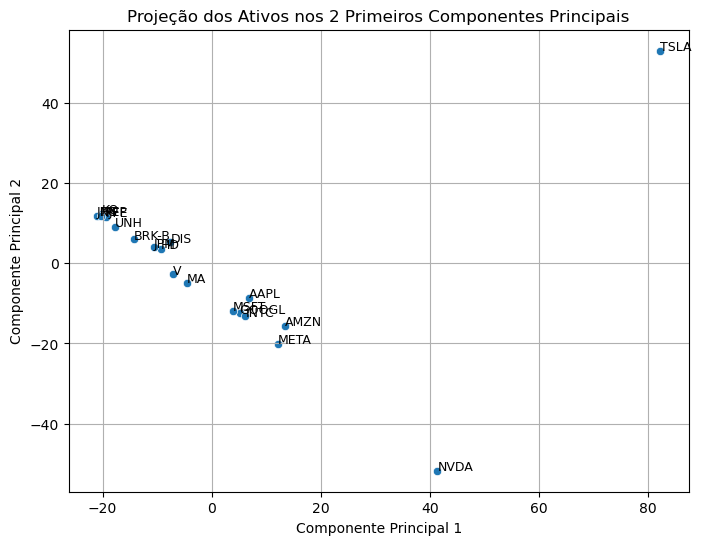

In [352]:
# Plotar projeção
plt.figure(figsize=(8, 6))
sns.scatterplot(x=coords[:, 0], y=coords[:, 1])
for i, nome in enumerate(retornos_T.index):
    plt.text(coords[i, 0], coords[i, 1], nome, fontsize=9)
plt.title("Projeção dos Ativos nos 2 Primeiros Componentes Principais")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()

## Padrões Observados na Visualização

### Agrupamentos Setoriais:
- **Empresas de tecnologia** (**NVDA, TSLA, META, AMZN**) tendem a **se agrupar**.
- **Empresas defensivas/consumo** (**KO, PG, PEP, JNJ**) formam **outro grupo**.
- **Financeiras** (**JPM, V, MA**) também mostram **proximidade**.

### Posicionamento:
- **TSLA e NVDA** se destacam por suas **posições extremas**, indicando **comportamento mais volátil**.
- **Empresas defensivas** se agrupam no **quadrante superior esquerdo**.
- **Tecnologia** tende a se concentrar no **quadrante inferior direito**.

### Interpretação dos Componentes:
- **PC1** parece separar **empresas de crescimento (direita) vs. valor (esquerda)**.
- **PC2** parece separar **empresas de maior volatilidade (extremos) vs. menor volatilidade (centro)**.

### Utilidade da Visualização:
Essa análise é útil para:
- **Identificar ativos** com **comportamentos similares**.
- **Planejar a diversificação** do portfólio.
- **Entender os principais fatores** que influenciam os **retornos dos ativos**.
- **Identificar clusters naturais de ativos**.
- **Entender as principais fontes de risco**.
- **Guiar decisões de diversificação**.
- **Monitorar concentrações setoriais**.

A análise sugere que uma **estratégia de diversificação efetiva** deve considerar não apenas os **setores tradicionais**, mas também as **características de risco reveladas pela PCA**.a PCA.

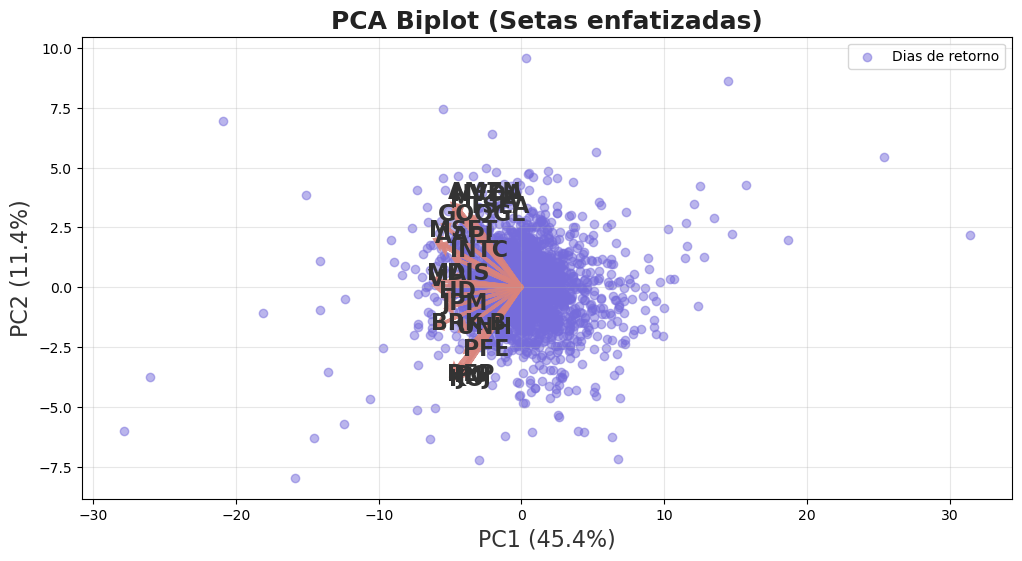

In [374]:
import matplotlib.pyplot as plt
import numpy as np

# Ajustar o tamanho da figura
plt.figure(figsize=(12, 6))

# Calcular os loadings escalados
loadings = pca.components_.T[:, :2]
scaled_loadings = loadings * np.sqrt(pca.explained_variance_[:2])

# Criar o scatter plot dos resultados PCA
plt.scatter(pca_results[:, 0], pca_results[:, 1], alpha=0.5, color='#766CDB', label="Dias de retorno")

# Ajuste para enfatizar mais as setas e os textos
seta_escala = 7  # Aumentando ainda mais o tamanho das setas
tamanho_fonte = 16  # Maior visibilidade para os nomes das ações

for i, (x, y) in enumerate(scaled_loadings):
    plt.arrow(0, 0, x*seta_escala, y*seta_escala, color='#DA847C', alpha=0.9, linewidth=2.5, head_width=0.4, head_length=0.4)
    plt.text(x*(seta_escala + 1), y*(seta_escala + 1), returns.columns[i], color='#333333', fontsize=tamanho_fonte, fontweight='bold')

# Configurar labels e título
plt.xlabel(f'PC1 ({var_exp[0]:.1f}%)', fontsize=16, color='#333333')
plt.ylabel(f'PC2 ({var_exp[1]:.1f}%)', fontsize=16, color='#333333')
plt.title('PCA Biplot (Setas enfatizadas)', fontsize=18, color='#222222', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()

# Exibir o gráfico
plt.show()

### Interpretação das Setas no Biplot

As **setas do biplot** representam a **direção** e a **intensidade** da influência de cada **ativo** nos **dois primeiros componentes principais** (**PC1 e PC2**).

- O **comprimento da seta** indica **quanto o ativo contribui** para a **variância explicada** por esses componentes.
- A **direção** da seta mostra se a influência do ativo está **mais alinhada ao PC1**, ao **PC2**, ou a **uma combinação dos dois**.

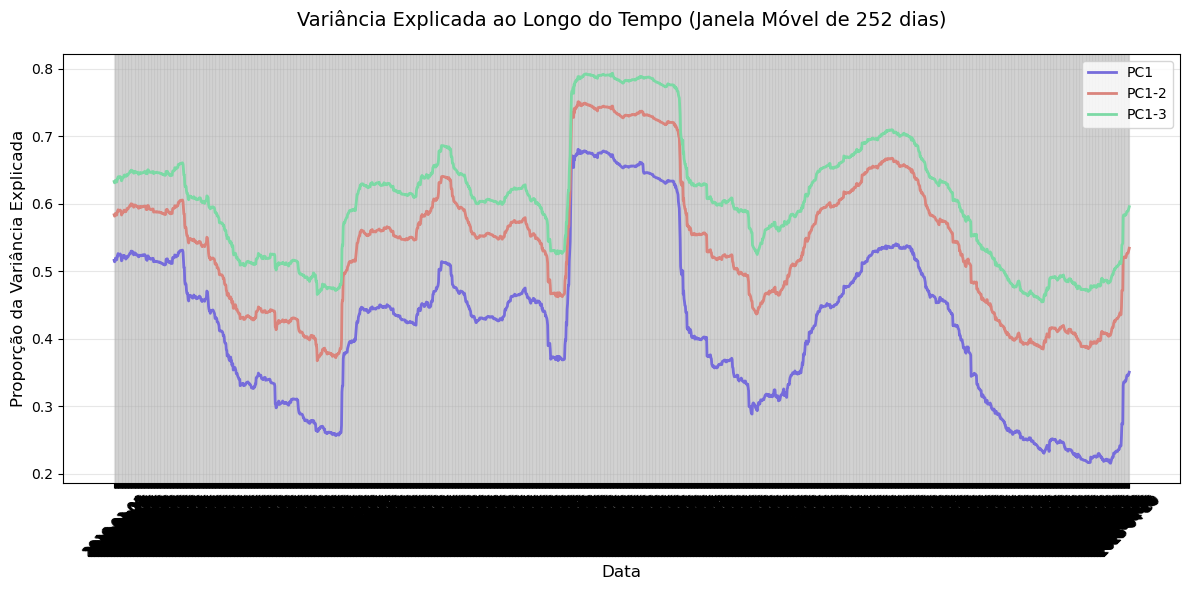

Estatísticas da variância explicada ao longo do tempo:
            PC1     PC1-2     PC1-3
count  2345.000  2345.000  2345.000
mean      0.421     0.542     0.608
std       0.121     0.101     0.089
min       0.216     0.367     0.455
25%       0.328     0.454     0.530
50%       0.432     0.550     0.609
75%       0.501     0.596     0.651
max       0.680     0.751     0.793


In [376]:
# Criar gráfico de Rolling Variance Explained
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Carregar dados
data = pd.read_csv('precos_fechamento_portfolio.csv', index_col=0)
retornos = data.pct_change().dropna()

# Definir janela móvel
window = 252  # 1 ano de trading
variance_explained = pd.DataFrame(index=retornos.index[window-1:])

# Calcular PCA rolling
for i in range(window, len(retornos) + 1):
    # Selecionar dados da janela
    window_data = retornos.iloc[i-window:i]
    
    # Padronizar dados
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(window_data)
    
    # Aplicar PCA
    pca = PCA()
    pca.fit(scaled_data)
    
    # Armazenar variância explicada pelos primeiros componentes
    variance_explained.loc[retornos.index[i-1], 'PC1'] = pca.explained_variance_ratio_[0]
    variance_explained.loc[retornos.index[i-1], 'PC1-2'] = sum(pca.explained_variance_ratio_[:2])
    variance_explained.loc[retornos.index[i-1], 'PC1-3'] = sum(pca.explained_variance_ratio_[:3])

# Plotar resultados
plt.figure(figsize=(12, 6))
plt.plot(variance_explained.index, variance_explained['PC1'], 
         label='PC1', linewidth=2, color='#766CDB')
plt.plot(variance_explained.index, variance_explained['PC1-2'], 
         label='PC1-2', linewidth=2, color='#DA847C')
plt.plot(variance_explained.index, variance_explained['PC1-3'], 
         label='PC1-3', linewidth=2, color='#7CD9A5')

plt.title('Variância Explicada ao Longo do Tempo (Janela Móvel de 252 dias)', 
          fontsize=14, pad=20)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Proporção da Variância Explicada', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Mostrar estatísticas descritivas
print("\
Estatísticas da variância explicada ao longo do tempo:")
print(variance_explained.describe().round(3))

## Gráfico de Variância Explicada em Janela Móvel

O **gráfico de Variância Explicada** mostra **quanto da variância total** nos retornos do portfólio é capturado pelo **primeiro componente principal (PC1)**, pela **soma dos dois primeiros (PC1-2)** e pela **soma dos três primeiros (PC1-3)** ao longo do tempo, utilizando uma **janela móvel de 252 dias de negociação** (aproximadamente **um ano**).

Essa visualização permite entender **como a importância dos principais fatores de risco muda** conforme as **condições de mercado evoluem**. 

- Quando a linha de **PC1 sobe**, significa que **um único fator comum** (como o **risco de mercado geral**) está explicando uma **parcela maior dos movimentos** do portfólio.
- Quando as linhas estão **mais baixas**, o risco está **mais diversificado** entre múltiplos fatores.

### Pontos-chave:

- **Em média**, o **PC1 explica cerca de 42% da variância**, enquanto os **três primeiros componentes juntos explicam cerca de 61%**.
- Há períodos em que **PC1 explica tão pouco quanto 21% ou até 68% da variância**, indicando que **a estrutura do mercado e a concentração de risco do portfólio podem mudar significativamente ao longo do tempo**.
- **Valores elevados de PC1 ou PC1-2** sugerem que o **portfólio está mais exposto a riscos sistemáticos (comuns)**, enquanto **valores mais baixos indicam maior diversificação** entre diferentes fontes de risco.
- Essa análise ajuda a **monitorar quão concentrado ou diversificado** está o **risco do portfólio** e pode **alertar para períodos em que um único fator domina a performance**, possivelmente sinalizando **aumento da vulnerabilidade a choques de mercado**.

# Benefícios do PCA para o Portfólio

- **Redução do risco não sistemático** ao evitar concentração em fatores específicos.
- **Melhoria da diversificação** ao combinar ativos de diferentes grupos.
- **Maior resiliência do portfólio** frente a choques em fatores de risco individuais.

Ao utilizar a **PCA** para agrupar ativos e orientar a alocação, é possível construir um **portfólio mais robusto, diversificado e alinhado** com os objetivos de risco e retorno do investidor.

# Resumo prático

- Use a **PCA** para identificar os principais fatores de risco.
- **Diversifique** escolhendo ativos com exposições distintas aos componentes principais.
- **Reduza a dimensionalidade** para facilitar a gestão e o monitoramento do portfólio.
- **Ajuste a alocação de ativos** com base nos insights dos componentes principais para otimizar o equilíbrio entre **risco e retorno**.